## Домашнее задание

Скачайте материалы к занятию. Проанализируйте ряды, сделайте их стационарными.

In [150]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [151]:
sales_of_company_x = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("Series/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("Series/daily-total-female-births-in-cal.csv")

In [152]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

In [153]:
seasonality = {
    "Monthly sales of company X": [4,6],
    "Monthly Boston armed robberies": [20, 20],
    "International airline passengers: monthly totals in thousands": [10,8],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": [5, 7],
    "Weekly closings of the Dow-Jones industrial average": [10,12],
    "Daily total female births in California": [30,30]
}

### Отображение графика:

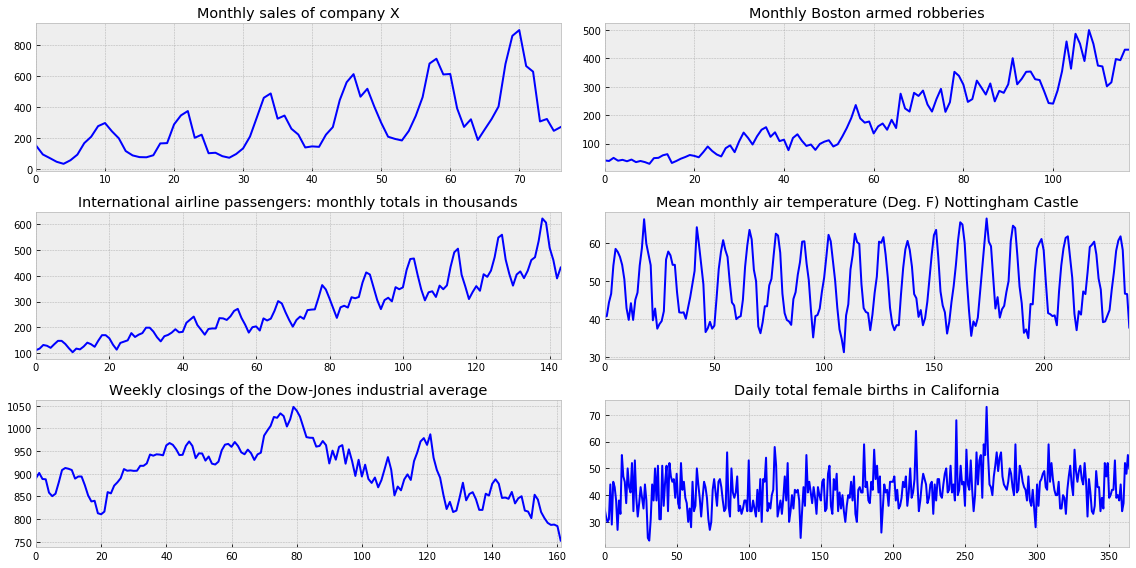

In [154]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

### Анализ сезонности:

In [155]:
def plot_ts_and_points(ts, start_point, step):
    new_series = [None for i in range(len(ts))]
    for i in range(len(ts)):
        pos = start_point + step * i
        if pos >= len(ts):
            break
        new_series[pos] = ts[pos]
    new_series = pd.Series(new_series)
    
    with plt.style.context('bmh'):
        plt.figure(figsize=(8, 4))
        ts_ax = plt.axes()
        ts.plot(ax=ts_ax, color='blue')
        new_series.plot(ax=ts_ax, style='ro')

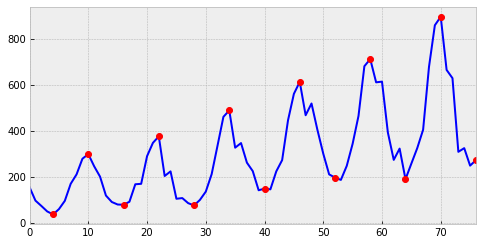

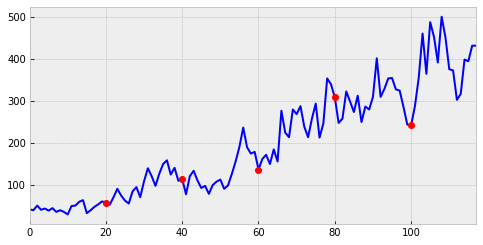

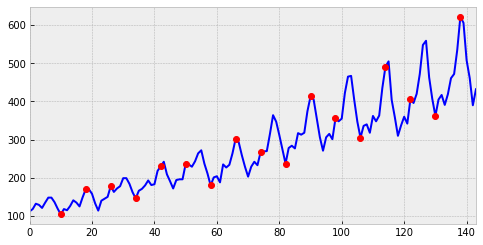

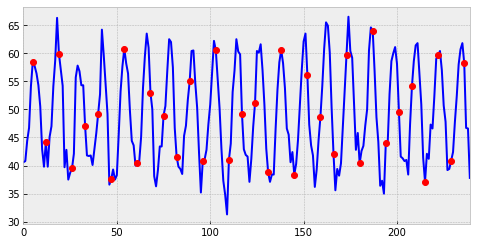

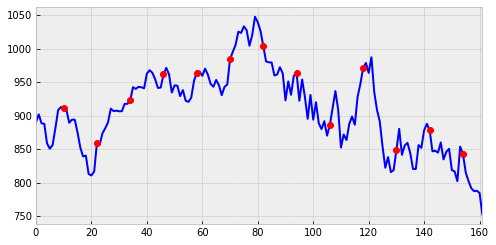

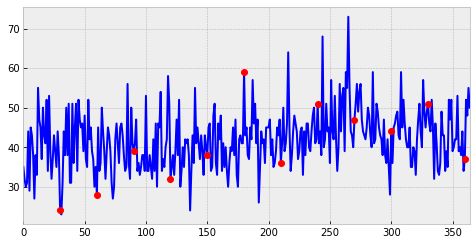

In [156]:
for i, key in enumerate(all_series.keys()):
    plot_ts_and_points(all_series[key], seasonality[key][0], seasonality[key][1])

### Нормализиуем дисперсию:

In [157]:
from scipy.stats import boxcox

In [158]:
series = {}

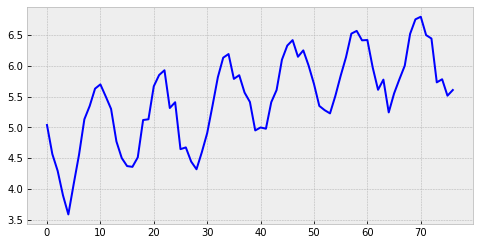

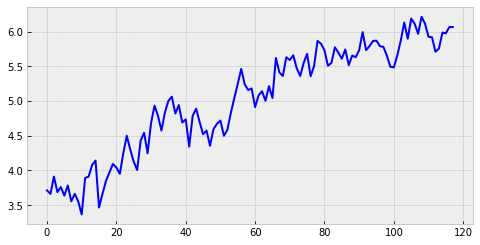

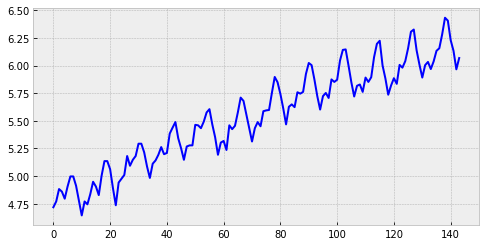

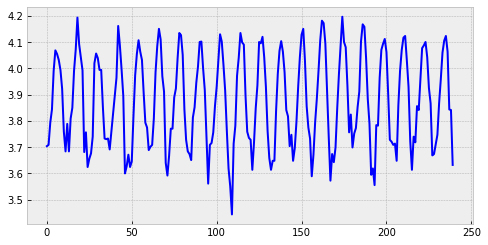

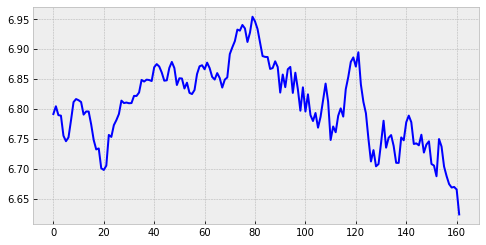

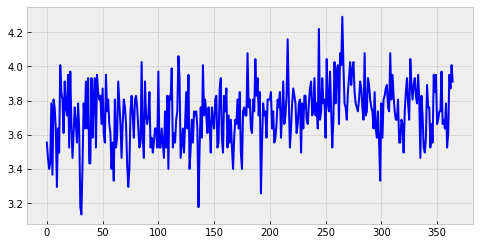

In [159]:
for i, key in enumerate(all_series.keys()):
    series[i] = boxcox(all_series[key], 0)
    with plt.style.context('bmh'):
        plt.figure(figsize=(8, 4))
        plt.plot(series[i], color='blue')

### Дифференцируем:

In [160]:
import numpy as np

In [161]:
diff_series = {}

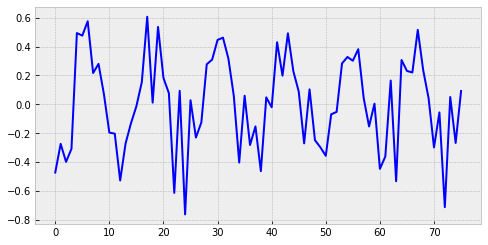

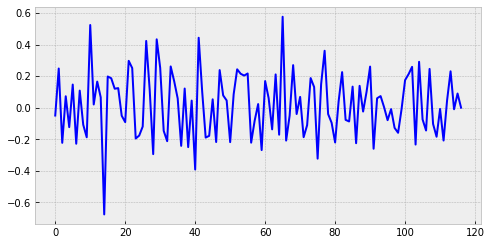

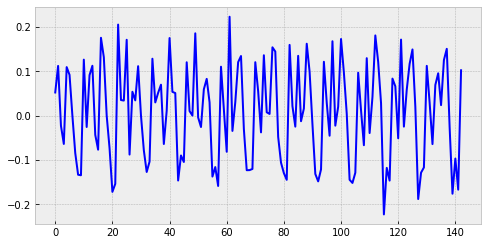

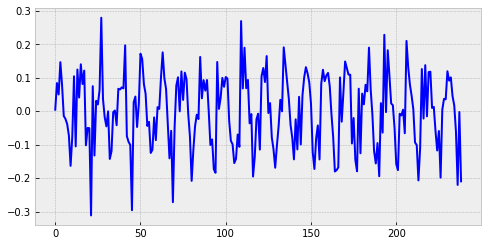

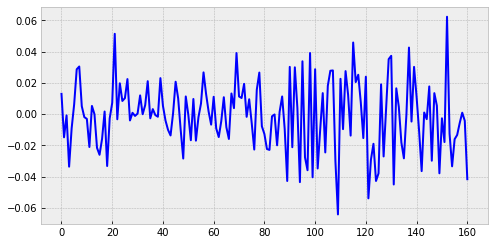

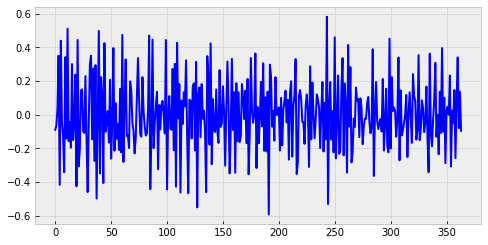

In [162]:
for i, key in enumerate(series.keys()):
    diff_series[i] = np.diff(series[key], 1)
    with plt.style.context('bmh'):
        plt.figure(figsize=(8, 4))
        plt.plot(diff_series[i], color='blue')

### Тест Дики-Фуллера:

In [163]:
from statsmodels.tsa.stattools import adfuller

In [164]:
################
 # Dickey-Fuller
##################
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    print("\n")

In [165]:
for i, key in enumerate(diff_series.keys()):
    test_stationarity(diff_series[key])

Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)      

### Коррелограмы:

In [166]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [167]:
def tsplot(y, lags=None, figsize=(12, 6), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

Коррелограмы дифференцируемых рядов:

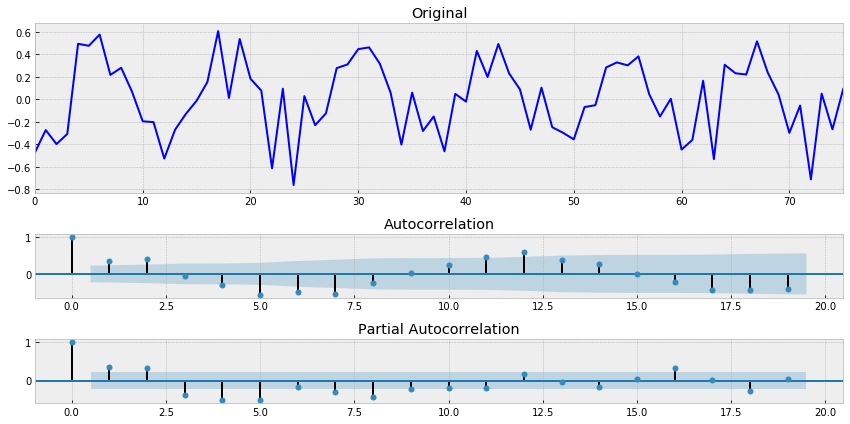

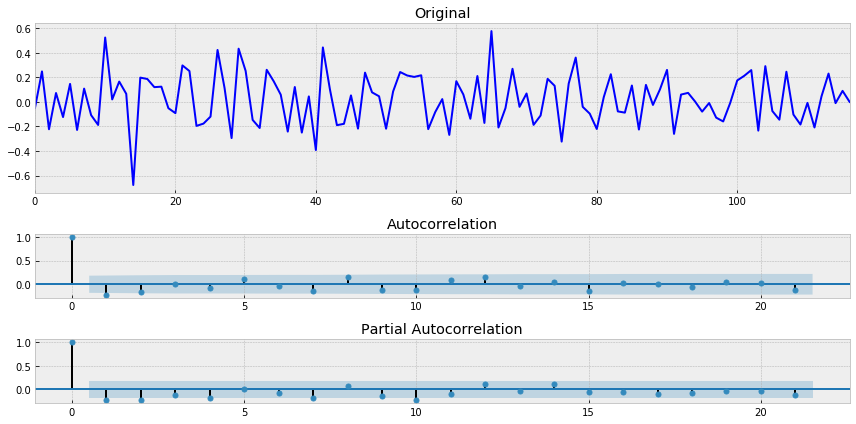

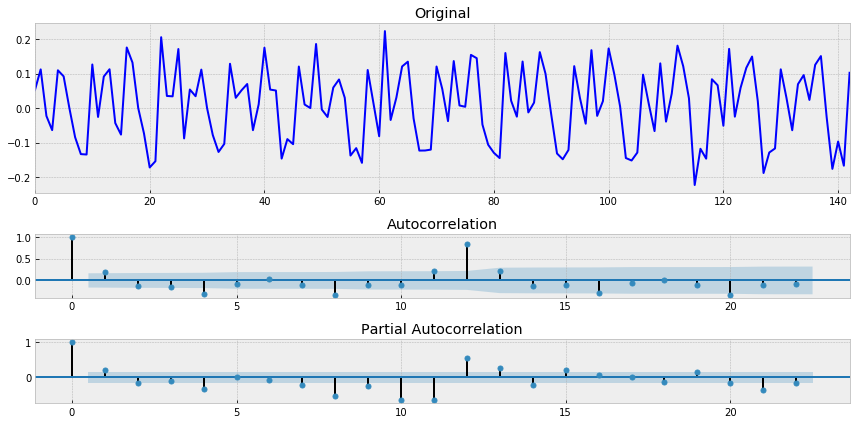

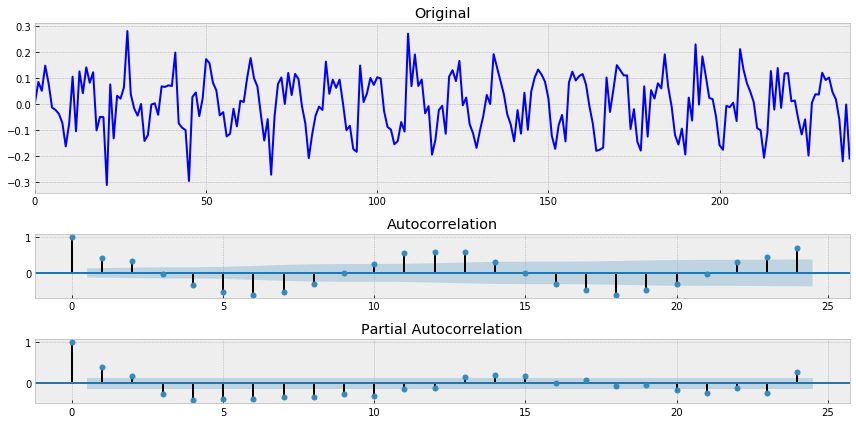

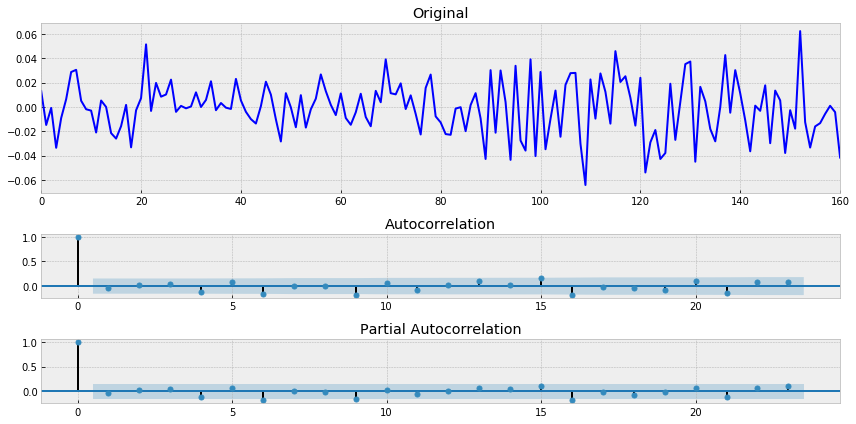

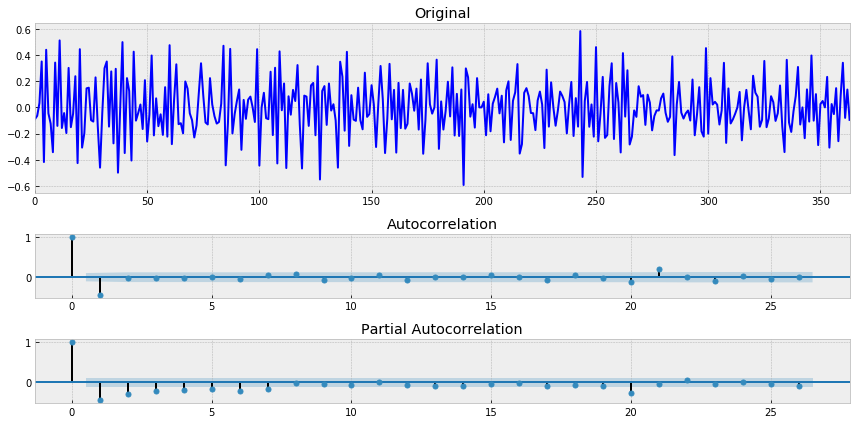

In [168]:
for i, key in enumerate(diff_series.keys()):
    tsplot(diff_series[key])

Коррелограмы оригинальных необработанных рядов:

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


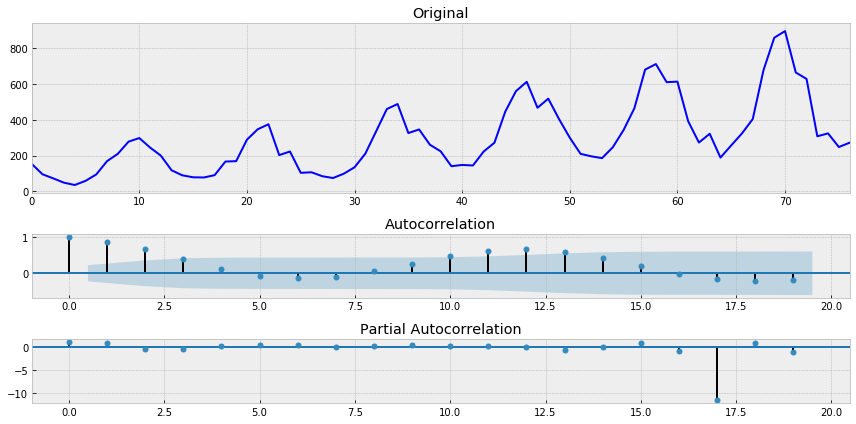

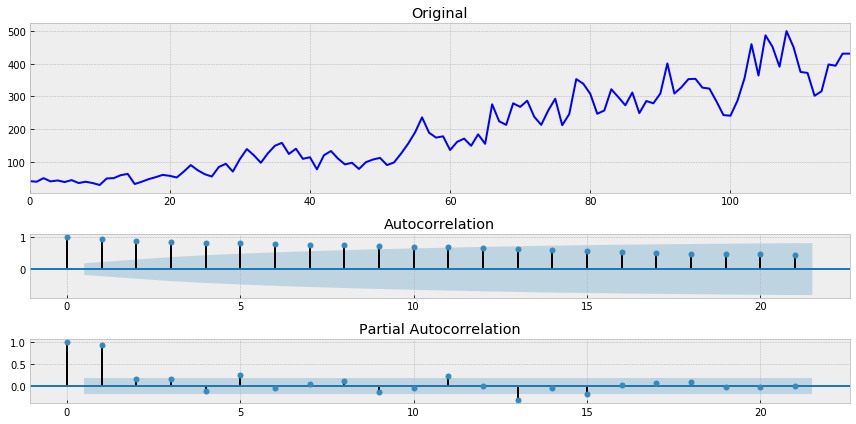

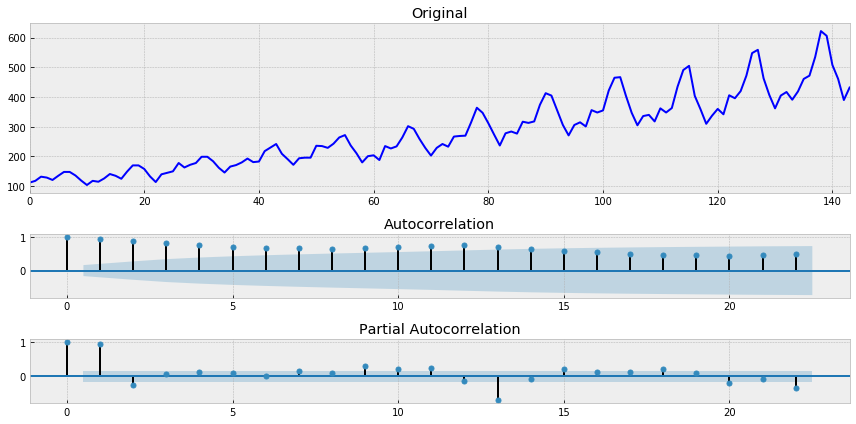

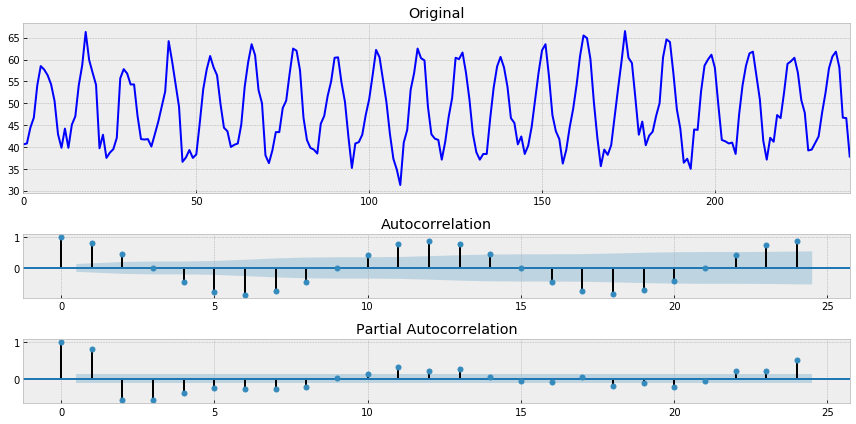

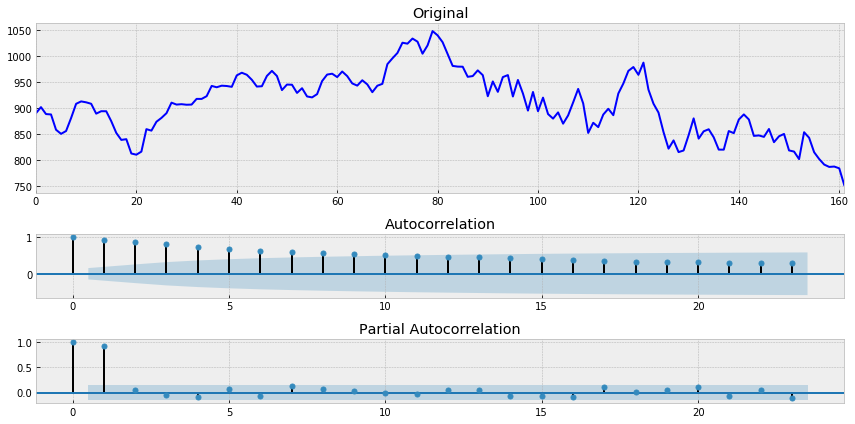

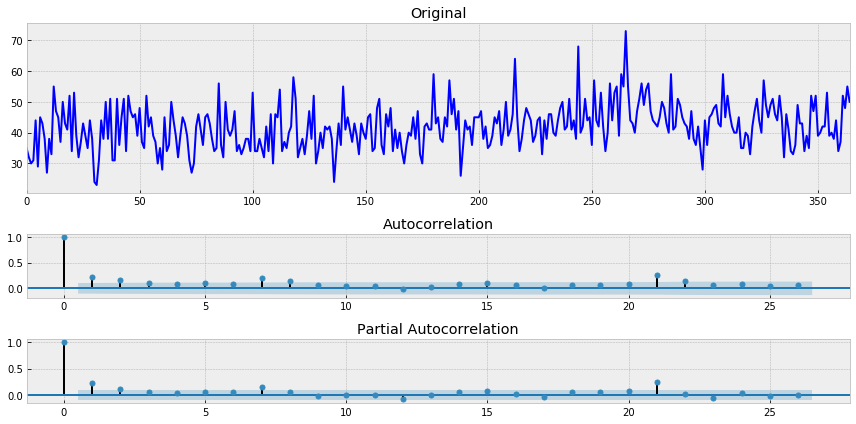

In [169]:
for i, key in enumerate(all_series.keys()):
    tsplot(all_series[key])